In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data loading

In [2]:
df = pd.read_csv('../data/train.csv', index_col=["id"])
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
id,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1


# Understanding the data

In [3]:
(
    df
    .isnull()
    .sum()
    .gt(0)  # checks if feature has greater than 0 nulls
    .sum()  # sums up True's, gives number of columns with greater than 0 nulls 
)

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin           1

In [5]:
df["smoking"].value_counts(normalize=True)

smoking
0    0.562635
1    0.437365
Name: proportion, dtype: float64

In [6]:
df.groupby(by=["dental caries"])["smoking"].mean()

dental caries
0    0.411082
1    0.543828
Name: smoking, dtype: float64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,159256.0,44.306626,11.842286,20.0,40.0,40.0,55.0,85.0
height(cm),159256.0,165.266929,8.818970,135.0,160.0,165.0,170.0,190.0
weight(kg),159256.0,67.143662,12.586198,30.0,60.0,65.0,75.0,130.0
waist(cm),159256.0,83.001990,8.957937,51.0,77.0,83.0,89.0,127.0
eyesight(left),159256.0,1.005798,0.402113,0.1,0.8,1.0,1.2,9.9
eyesight(right),159256.0,1.000989,0.392299,0.1,0.8,1.0,1.2,9.9
hearing(left),159256.0,1.023974,0.152969,1.0,1.0,1.0,1.0,2.0
hearing(right),159256.0,1.023421,0.151238,1.0,1.0,1.0,1.0,2.0
systolic,159256.0,122.503648,12.729315,77.0,114.0,121.0,130.0,213.0
relaxation,159256.0,76.874071,8.994642,44.0,70.0,78.0,82.0,133.0


<Axes: >

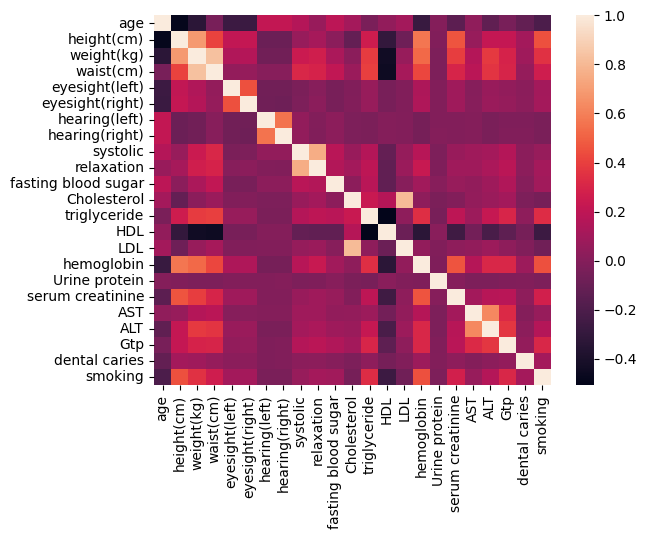

In [10]:
sns.heatmap(df.corr(), annot=False)